In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "drive/MyDrive/CNN Stock Prediction"

/content/drive/.shortcut-targets-by-id/11M8JhuGjMeTkxBAoI1sL3lLEa69ylHrV/CNN Stock Prediction


# Dependencies

In [ ]:
import pandas as pd
import numpy as np
import json

import matplotlib as plt
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

# Load Data (Prices + Indicators + Labels)

In [ ]:
stock = "IBM"
data_path = f"data/labeled_indicators/IBM_all_labeled_indicators.csv"
df = pd.read_csv(data_path)

df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,adjustRatio,Label,RSI_ta_6,...,AWSM_ta_11,AWSM_ta_12,AWSM_ta_13,AWSM_ta_14,AWSM_ta_15,AWSM_ta_16,AWSM_ta_17,AWSM_ta_18,AWSM_ta_19,AWSM_ta_20
59,2004-07-07,145.42,146.51,81.31,145.51,81.60,5938456,1.78,0,10.900907,...,-1.007045,-0.709792,-0.436346,-0.237143,0.036833,0.298906,0.521176,0.798333,1.004211,1.098000
60,2004-07-08,144.89,144.91,79.90,142.59,79.97,7875334,1.78,1,6.896011,...,-1.432955,-1.107917,-0.837115,-0.604107,-0.379667,-0.099531,0.143529,0.447083,0.668553,0.848500
61,2004-07-09,143.87,144.03,79.84,143.00,80.20,6898579,1.78,0,12.323443,...,-1.928409,-1.534792,-1.239038,-0.990536,-0.759667,-0.490469,-0.230147,0.055278,0.327368,0.557500
62,2004-07-12,143.20,145.32,79.75,143.36,80.40,6285623,1.78,0,17.397102,...,-2.335227,-1.991875,-1.582308,-1.314821,-1.105833,-0.856562,-0.583971,-0.343889,0.013026,0.230875
63,2004-07-13,146.42,146.74,81.45,145.31,81.50,6277046,1.78,0,39.974992,...,-2.545000,-2.361042,-1.959808,-1.593036,-1.354167,-1.152813,-0.869265,-0.620417,-0.345000,-0.025000


# Clean Data

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,adjustRatio,Label,RSI_ta_6,RSI_ta_7,...,AWSM_ta_11,AWSM_ta_12,AWSM_ta_13,AWSM_ta_14,AWSM_ta_15,AWSM_ta_16,AWSM_ta_17,AWSM_ta_18,AWSM_ta_19,AWSM_ta_20
count,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4.976000e+03,4976.000000,4976.000000,4976.000000,4976.000000,...,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000
mean,192.264365,193.852006,132.069795,192.372777,133.141668,5.729091e+06,1.463816,0.187098,51.421823,51.349937,...,0.078239,0.085819,0.093587,0.101465,0.109297,0.116997,0.124539,0.132011,0.139361,0.146661
std,51.676093,51.862838,32.834472,51.703395,32.938430,3.250481e+06,0.235612,0.528734,18.428638,17.127456,...,2.886346,3.011245,3.129132,3.239821,3.343718,3.441570,3.533977,3.621356,3.704261,3.783409
min,110.000000,113.650000,66.440000,110.190000,68.590000,1.074765e+06,1.000000,-1.000000,1.192917,1.808998,...,-15.744773,-16.578958,-17.243846,-17.732321,-18.193500,-18.525156,-18.901912,-19.180556,-19.398684,-19.598000
25%,148.700000,149.965000,111.535000,148.775000,112.735000,3.714425e+06,1.270000,0.000000,38.046770,38.902163,...,-1.419830,-1.473854,-1.540337,-1.600446,-1.654000,-1.707695,-1.761103,-1.811285,-1.853980,-1.871938
50%,183.190000,184.975000,132.595000,183.440000,133.595000,4.864736e+06,1.520000,0.000000,51.688022,51.456125,...,0.207955,0.259167,0.281731,0.291964,0.339250,0.367969,0.416250,0.418819,0.447434,0.449250
75%,223.232500,224.825000,153.812500,223.260000,154.872500,6.668982e+06,1.660000,0.000000,64.894104,63.776310,...,1.809716,1.902500,1.991154,2.072366,2.142125,2.224023,2.304559,2.352813,2.422566,2.480250
max,320.960000,321.730000,204.880000,321.580000,206.310000,3.981442e+07,1.780000,2.000000,97.374535,95.988340,...,10.148409,10.263542,10.302692,10.284464,10.298833,10.283281,10.337353,10.359861,10.394079,10.511500


In [ ]:
df.count()

Date          4976
Open          4976
High          4976
Low           4976
Close         4976
              ... 
AWSM_ta_16    4976
AWSM_ta_17    4976
AWSM_ta_18    4976
AWSM_ta_19    4976
AWSM_ta_20    4976
Length: 429, dtype: int64

In [ ]:
df.shape

(4976, 429)

In [ ]:
# Length of all features
feats = list(df.columns)
print(f"Total Number of features: {len(feats)}")

Total Number of features: 429


In [ ]:
cols_to_drop = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "adjustRatio"]
df = df.drop(cols_to_drop, axis = 1)
df = df.iloc[:-5, :]

In [ ]:
df.Label.value_counts()

Label
0    4347
1     312
2     312
Name: count, dtype: int64

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from pprint import pprint

In [ ]:
X = df.iloc[:, df.columns != 'Label'].iloc[:, :225]
y = df.iloc[:, df.columns == 'Label']

print("Shape of Features: ", X.values.shape)
print("Shape of Labels: ", y.values.shape)

Shape of Features:  (4971, 225)
Shape of Labels:  (4971, 1)


In [ ]:
X.head()

,RSI_ta_6,RSI_ta_7,RSI_ta_8,RSI_ta_9,RSI_ta_10,RSI_ta_11,RSI_ta_12,RSI_ta_13,RSI_ta_14,RSI_ta_15,...,VWAP_ta_11,VWAP_ta_12,VWAP_ta_13,VWAP_ta_14,VWAP_ta_15,VWAP_ta_16,VWAP_ta_17,VWAP_ta_18,VWAP_ta_19,VWAP_ta_20
59,10.900907,13.984287,16.808864,19.335721,21.561469,23.502503,25.184977,26.638602,27.893021,28.975873,...,128.433052,128.588786,128.883160,129.051384,129.173226,129.346843,129.444530,129.536821,129.640379,129.705214
60,6.896011,9.373318,11.775636,14.029307,16.097933,17.969272,19.645962,21.139139,22.464201,23.638116,...,127.439008,127.675569,127.858840,128.189224,128.379593,128.516978,128.710869,128.830592,128.938996,129.067470
61,12.323443,14.017505,15.820532,17.601332,19.288652,20.847486,22.264740,23.540211,24.680870,25.697282,...,126.513412,126.889058,127.136572,127.332215,127.678722,127.880018,128.025369,128.229909,128.362571,128.480475
62,17.397102,18.306041,19.523081,20.849862,22.176042,23.441957,24.617978,25.692290,26.663413,27.535602,...,125.801822,126.162413,126.527302,126.775006,126.973474,127.322889,127.527401,127.675384,127.883632,128.022710
63,39.974992,37.884477,36.745996,36.181767,35.963598,35.950929,36.056389,36.225617,36.425001,36.634057,...,125.232060,125.682250,126.018673,126.362362,126.599770,126.791908,127.130872,127.330789,127.475952,127.680695


In [ ]:
# Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8,
                                                    test_size=0.2, random_state=2, shuffle=True,
                                                    stratify=y.values)


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3976, 225)
y_train shape: (3976, 1)
X_test shape: (995, 225)
y_test shape: (995, 1)


In [ ]:
# Training and Cross Validation Data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8,
                                                    test_size=0.2, random_state=2, shuffle=True,
                                                    stratify=y_train)

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (3180, 225)
y_train shape: (3180, 1)
X_val shape: (796, 225)
y_val shape: (796, 1)


# Reshape data as 15x15 images

In [ ]:
X_train_images = X_train.reshape(X_train.shape[0], 15, 15)
X_val_images = X_val.reshape(X_val.shape[0], 15, 15)
X_test_images = X_test.reshape(X_test.shape[0], 15, 15)

print(f"X_train Images shape: {X_train_images.shape}")
print(f"X_val Images shape: {X_val_images.shape}")
print(f"X_test Images shape: {X_test_images.shape}")

X_train Images shape: (3180, 15, 15)
X_val Images shape: (796, 15, 15)
X_test Images shape: (995, 15, 15)


## Show Images

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

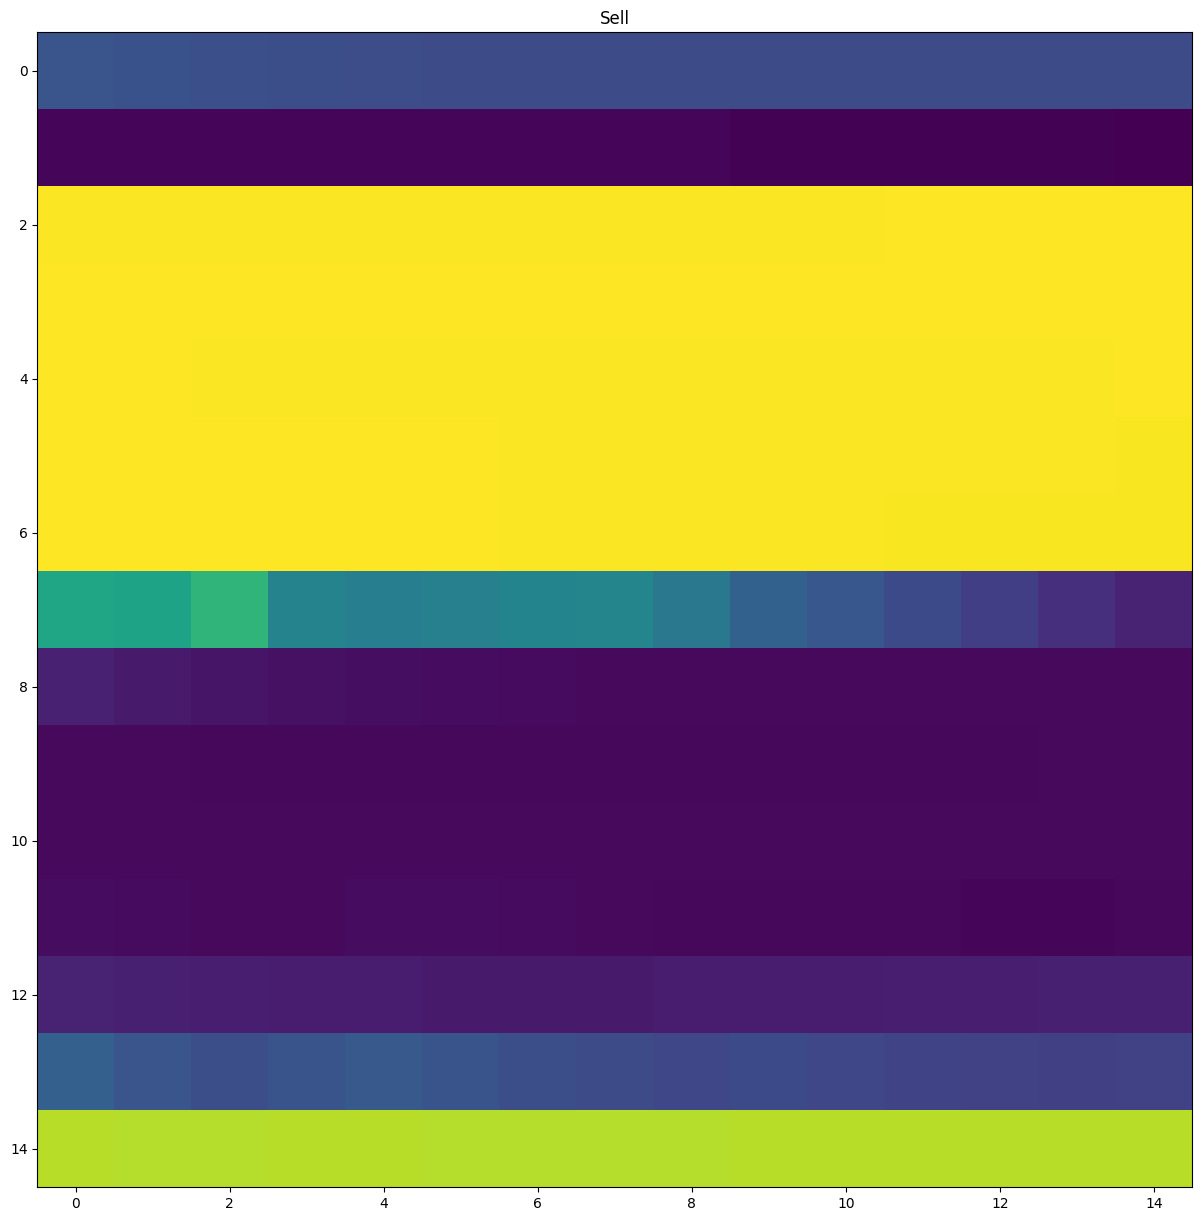

In [ ]:
fig = plt.figure(figsize=(15, 15))

rand_idx = np.random.randint(len(X_train_images))
img = X_train_images[rand_idx]
label = y_train[rand_idx]

if label == 1: label = "Buy"
if label == 2: label = "Sell"
plt.title(label)
plt.imshow(img)

# Normalize and Encode Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
# MinMaxScaler Features
MM_SCALER = MinMaxScaler(feature_range=(-1, 1))

X_train = MM_SCALER.fit_transform(X_train)
X_val = MM_SCALER.transform(X_val)
X_test = MM_SCALER.transform(X_test)

In [ ]:
# One Hot Encode Labels
"""
0 -> [1, 0, 0]
1 -> [0, 1, 0]
2 -> [0, 0, 1]
"""
OHE = OneHotEncoder(sparse=False, categories='auto')

y_train = OHE.fit_transform(y_train.reshape(-1, 1)) # Reshapes to a column vector
y_val = OHE.transform(y_val.reshape(-1, 1))
y_test = OHE.transform(y_test.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(f"X_train Images shape: {X_train_images.shape}")
print(f"y_train labels shape: {y_train.shape}\n")

print(f"X_val Images shape: {X_val_images.shape}")
print(f"y_val labels shape: {y_val.shape}\n")

print(f"X_test Images shape: {X_test_images.shape}")
print(f"y_test labels shape: {y_test.shape}\n")

X_train Images shape: (3180, 15, 15)
y_train labels shape: (3180, 3)

X_val Images shape: (796, 15, 15)
y_val labels shape: (796, 3)

X_test Images shape: (995, 15, 15)
y_test labels shape: (995, 3)



# CNN Model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

!pip install h5py

## CNN Model Implementation

In [ ]:
params = {
    "input_w": 15,
    "input_h": 15,
    "input_c": 3,
    "num_classes": 3,
    "batch_size": 1024,
    "epochs": 3000
    }

In [ ]:
from tensorflow.keras import regularizers

# CNN model
model = Sequential()
# Conv2D
model.add(Conv2D(filters = 20,
                 kernel_size = 2,
                 strides = 1,
                 padding = 'valid',
                 activation='relu',
                 use_bias = True,
                 kernel_regularizer=regularizers.l2(0.0),
                 kernel_initializer='glorot_uniform',
                 input_shape=(params["input_w"],
                              params["input_h"],
                              params["input_c"])
                  ))

# Dropout
model.add(Dropout(0.22))

# Conv2D
model.add(Conv2D(filters = 40,
                 kernel_size = 2,
                 strides = 2,
                 padding = 'valid',
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.0),
                 kernel_initializer='glorot_uniform',
                 ))

# Dropout
model.add(Dropout(0.05))

# Flatten
model.add(Flatten())

# Dense
model.add(Dense(100, activation='relu'))

# Dropout
model.add(Dropout(0.22))

# Dense
model.add(Dense(3, activation='softmax'))

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mae', 'mse'])

In [ ]:
# Old CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(params["input_w"], params["input_h"], params["input_c"])))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(params["num_classes"], activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy', 'mae', 'mse'])

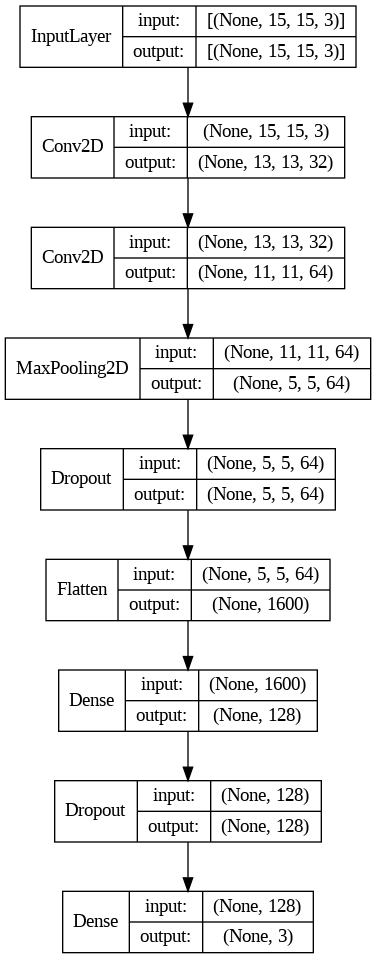

In [ ]:
# Plot Model
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

plot_model(model, show_shapes=True, show_layer_names=False)

## Model Checkpoint Callbacks

In [ ]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback

best_model_path = "data/Eric_best_model_keras.h5"
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                   patience=100, min_delta=0.0001) # Stops the training early when validation loss stops improving, prevent overfitting

rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.02, patience=20, verbose=1, mode='min',
                        min_delta=0.001, cooldown=1, min_lr=0.0001) # Adjusts Learning Rate on validation loss

mcp = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=1,
                      save_best_only=True, save_weights_only=False, mode='min', save_freq="epoch")  # val_f1_metric

## Training Model

In [ ]:
# Reshape input images to include a single channel to fit CNN Sequential Layer
X_train_images = np.expand_dims(X_train_images, axis=-1)
X_val_images = np.expand_dims(X_val_images, axis=-1)
X_test_images = np.expand_dims(X_test_images, axis=-1)

In [ ]:
# Reshape into 3 channels
X_train_images = np.stack((X_train_images,)*3, axis=-1)
X_val_images = np.stack((X_val_images,)*3, axis=-1)
X_test_images = np.stack((X_test_images,)*3, axis=-1)

In [ ]:
print(f"X_train Images shape: {X_train_images.shape}")
print(f"y_train labels shape: {y_train.shape}\n")

print(f"X_val Images shape: {X_val_images.shape}")
print(f"y_val labels shape: {y_val.shape}\n")

print(f"X_test Images shape: {X_test_images.shape}")
print(f"y_test labels shape: {y_test.shape}\n")

X_train Images shape: (3180, 15, 15, 3)
y_train labels shape: (3180, 3)

X_val Images shape: (796, 15, 15, 3)
y_val labels shape: (796, 3)

X_test Images shape: (995, 15, 15, 3)
y_test labels shape: (995, 3)



In [ ]:
%%time
hist = model.fit(X_train_images, y_train,
          batch_size=params["batch_size"],
          epochs=1500,
          callbacks=[mcp, rlp],
          validation_data = (X_val_images, y_val),
          verbose=1)

Streaming output truncated to the last 5000 lines.
Epoch 251: val_loss did not improve from 0.32496
4/4 [==============================] - 0s 22ms/step - loss: 0.3476 - accuracy: 0.8745 - mae: 0.1462 - mse: 0.0695 - val_loss: 0.3346 - val_accuracy: 0.8744 - val_mae: 0.1444 - val_mse: 0.0683 - lr: 1.0000e-04
Epoch 252/1500
1/4 [======>.......................] - ETA: 0s - loss: 0.3446 - accuracy: 0.8682 - mae: 0.1445 - mse: 0.0705
Epoch 252: val_loss did not improve from 0.32496
4/4 [==============================] - 0s 23ms/step - loss: 0.3446 - accuracy: 0.8745 - mae: 0.1436 - mse: 0.0689 - val_loss: 0.3337 - val_accuracy: 0.8744 - val_mae: 0.1425 - val_mse: 0.0681 - lr: 1.0000e-04
Epoch 253/1500
1/4 [======>.......................] - ETA: 0s - loss: 0.3501 - accuracy: 0.8750 - mae: 0.1448 - mse: 0.0698
Epoch 253: val_loss did not improve from 0.32496
4/4 [==============================] - 0s 20ms/step - loss: 0.3438 - accuracy: 0.8742 - mae: 0.1427 - mse: 0.0691 - val_loss: 0.3333 - v

# Model Evaluation

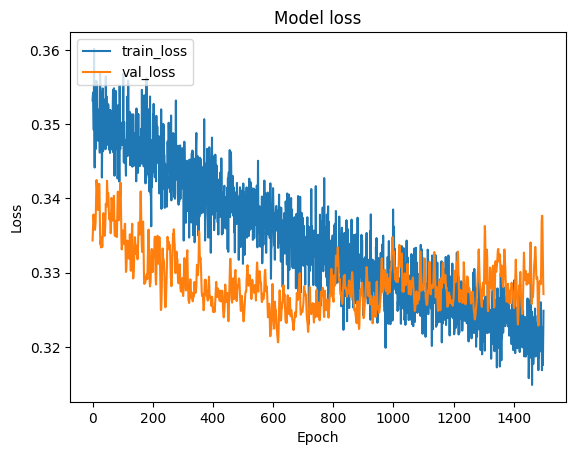

NameError: name 'fold' is not defined

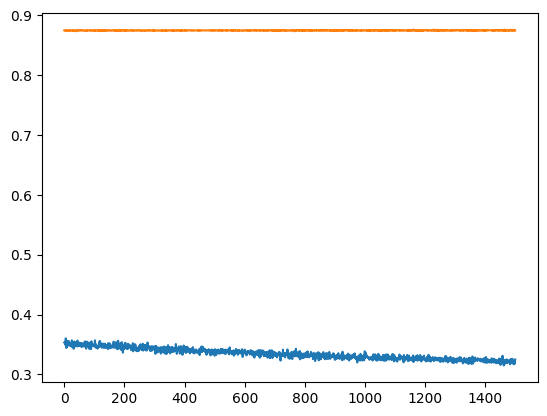

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
# plt.plot(hist.history['f1_metric'])
# plt.plot(hist.history['val_f1_metric'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()


plt.figure()

plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])

plt.title(f'Model Loss and Accuracy: Fold {fold}')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'accuracy'], loc='upper left')

plt.show()

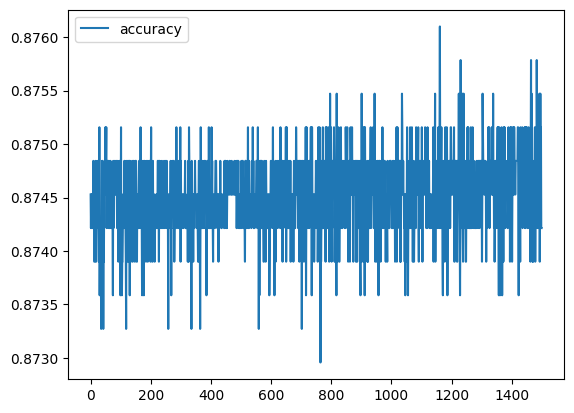

In [ ]:
plt.plot(hist.history['accuracy'])
plt.legend(['accuracy'], loc='upper left')